<a href="https://colab.research.google.com/github/oh-sumin/github_test/blob/main/section1project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### .

In [358]:
import pandas as pd
import numpy as np
from google.colab import drive

#warning 끄기
pd.set_option('mode.chained_assignment', 'raise')
pd.set_option('mode.chained_assignment', 'warn')
pd.set_option('mode.chained_assignment',  None)

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/vgames2.csv',index_col=0)#unnamed 제거
print(df.shape)
print(df.head(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(16598, 9)
                                             Name Platform  ...  JP_Sales Other_Sales
1                    Candace Kane's Candy Factory       DS  ...         0           0
2                                  The Munchables      Wii  ...         0        0.01
3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...      0.02           0

[3 rows x 9 columns]


#### .

## ❗️결측치 확인 및 제거

In [359]:
print('전체 데이터의 행과 열의 갯수','\n',df.shape)
print('\n')
print('결측치의 갯수')
print(df.isna().sum())
df = df.dropna()
print('\n')
print('결측치 제거 후 행과 열의 갯수','\n',df.shape)

전체 데이터의 행과 열의 갯수 
 (16598, 9)


결측치의 갯수
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


결측치 제거 후 행과 열의 갯수 
 (16241, 9)


결측치를 가지고 있는 데이터가 전체 데이터에 크게 영향을 끼치지 않을 정도라고 판단하여 해당 데이터를 제거하였습니다.

#### .

In [360]:
#platfrom 과 Year column에 이상값이 있는지 확인
print('platform 이상값 확인')
print(df['Platform'].value_counts().head(3))
print('\n')
print('Year 이상값 확인')
print(df['Year'].value_counts().head(3))

platform 이상값 확인
DS     2127
PS2    2121
PS3    1299
Name: Platform, dtype: int64


Year 이상값 확인
2009.0    1418
2008.0    1413
2010.0    1246
Name: Year, dtype: int64


In [361]:
#platform에서 2600을 VCS로 변경하기
df = df.replace('2600','VCS')
#위에서 확인한 year의 이상값들 변경하기
df = df.replace(12,2012)
df = df.replace(97,1997)
df = df.replace(94,1994)
df = df.replace(86,1986)
df = df.replace(9,2009)
df = df.replace(11,2011)
df = df.replace(8,2008)
df = df.replace(3,2003)
df = df.replace(6,2006)
df = df.replace(10,2010)
df = df.replace(15,2015)
df = df.replace(16,2016)
df = df.replace(4,2004)
df = df.replace(95,1995)
df = df.replace(5,2005)
df = df.replace(96,1996)
df = df.replace(98,1998)
df = df.replace(2,2002)
df = df.replace(0,2000)
df = df.replace(1,2001)
df = df.replace(14,2014)
df = df.replace(13,2013)
df = df.replace(7,2007)

In [362]:
#매출액에서 K 는 *0.001 로 M 은 없애주기
def function(x):
  if 'K' in x :
    x = x.replace('K','')
    return float(x)*0.001
  elif 'M' in x :
    x = x.replace('M','')
    return float(x)
  else:
    return float(x)

df['NA_Sales'] = df['NA_Sales'].apply(function)
df['EU_Sales'] = df['EU_Sales'].apply(function)
df['JP_Sales'] = df['JP_Sales'].apply(function)
df['Other_Sales'] = df['Other_Sales'].apply(function)

#📌지역에 따라서 선호하는 게임 장르가 다를까

#### ✔️지역별 전체 게임에 대한 장르 선호도

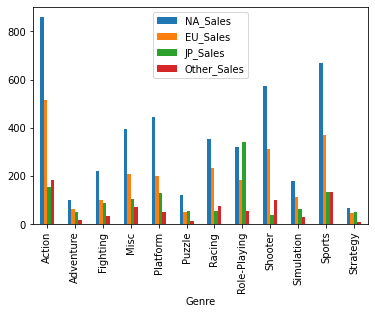

In [363]:
dfg = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
dfg = dfg.groupby('Genre').sum() 
dfg.plot(kind='bar')

#### .

In [364]:
df1 = df[['Genre','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
#지역별 매출순위 top20
df1_1 = df1[['Genre','Year','NA_Sales']]
df1_1.set_index('Genre')
df1_1 =df1_1.sort_values(by='NA_Sales',ascending=False)
df1_1h = df1_1.head(20)

df1_2 = df1[['Genre','Year','EU_Sales']]
df1_2.set_index('Genre')
df1_2 =df1_2.sort_values(by='EU_Sales',ascending=False)
df1_2h=df1_2.head(20)

df1_3 = df1[['Genre','Year','JP_Sales']]
df1_3.set_index('Genre')
df1_3 =df1_3.sort_values(by='JP_Sales',ascending=False)
df1_3h = df1_3.head(20)

In [365]:
#장르별로 top20 위에 몇개 올랐는지
df1_1g = df1_1h.groupby('Genre').size()
df1_2g = df1_2h.groupby('Genre').size()
df1_3g = df1_3h.groupby('Genre').size()

print('북미','\n',df1_1g)
print('\n')
print('유럽','\n',df1_2g)
print('\n')
print('일본','\n',df1_3g)

북미 
 Genre
Action          2
Misc            2
Platform        6
Puzzle          1
Racing          2
Role-Playing    1
Shooter         2
Simulation      1
Sports          3
dtype: int64


유럽 
 Genre
Action          2
Misc            2
Platform        2
Racing          2
Role-Playing    3
Shooter         2
Simulation      2
Sports          5
dtype: int64


일본 
 Genre
Action          1
Misc            1
Platform        4
Puzzle          2
Racing          1
Role-Playing    9
Simulation      2
dtype: int64


#### ✔️지역별 매출 TOP20

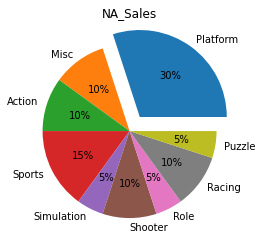

In [366]:
value = [30,10,10,15,5,10,5,10,5]
label = ['Platform','Misc','Action','Sports','Simulation','Shooter','Role','Racing','Puzzle']
explode =[0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
plt.pie(value,labels=label,autopct='%1.0f%%',explode=explode)
plt.title('NA_Sales')
plt.show()

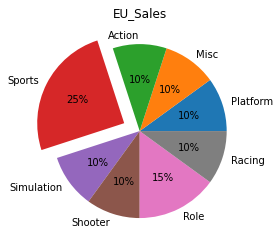

In [367]:
value = [10,10,10,25,10,10,15,10]
label = ['Platform','Misc','Action','Sports','Simulation','Shooter','Role','Racing']
explode =[0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0]
plt.pie(value,labels=label,autopct='%1.0f%%',explode=explode)
plt.title('EU_Sales')
plt.show()

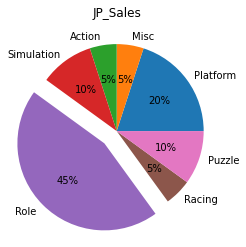

In [368]:
value = [20,5,5,10,45,5,10]
label = ['Platform','Misc','Action','Simulation','Role','Racing','Puzzle']
explode =[0.0,0.0,0.0,0.0,0.2,0.0,0.0]
plt.pie(value,labels=label,autopct='%1.0f%%',explode=explode)
plt.title('JP_Sales')
plt.show()

#📌연도별 게임의 트렌드가 있을까

#### .

In [369]:
df2 = df[['Year','Genre']]
years = list(range(1980,2025,5)) #1980년부터 2025년까지 5단위로 데이터 생성
years_label = [int(x) for x in years] #문자열함수로 years_label리스트 생성
df2['years']= pd.cut(df2['Year'],years,right=False, labels=years_label[:-1])#칼럼 데이터 추가
df2

,Year,Genre,years
1,2008.0,Action,2005
2,2009.0,Action,2005
3,2010.0,Adventure,2010
4,2010.0,Misc,2010
5,2010.0,Platform,2010
...,...,...,...
16594,2006.0,Platform,2005
16595,2005.0,Action,2005
16596,2015.0,Sports,2015
16597,2013.0,Action,2010


In [370]:
df2.groupby(['years','Genre']).size()

years  Genre       
1980   Action           52
       Adventure         1
       Fighting          1
       Misc              7
       Platform         14
                      ... 
2015   Role-Playing    120
       Shooter          66
       Simulation       24
       Sports          100
       Strategy         27
Length: 96, dtype: int64

In [371]:
df2_2=df2.groupby(['years','Genre']).size()
df2_2=df2_2.reset_index()
df2_2.columns=['years','Genre','sum']
df2_2.head(3)

,years,Genre,sum
0,1980,Action,52
1,1980,Adventure,1
2,1980,Fighting,1


In [372]:
df2_2=df2_2.set_index('Genre')
df1980=df2_2[df2_2['years'].isin([1980])]
df1985=df2_2[df2_2['years'].isin([1985])]
df1990=df2_2[df2_2['years'].isin([1990])]
df1995=df2_2[df2_2['years'].isin([1995])]
df2000=df2_2[df2_2['years'].isin([2000])]
df2005=df2_2[df2_2['years'].isin([2005])]
df2010=df2_2[df2_2['years'].isin([2010])]
df2015=df2_2[df2_2['years'].isin([2015])]
df2020=df2_2[df2_2['years'].isin([2020])]

In [373]:
df2015sum = df2015['sum'].sum()
df2015.loc['Action','sum']/df2015sum*100

38.912133891213394

#### ✔️구간별 종목 선호도

Text(0.5, 1.0, '2015-2019')

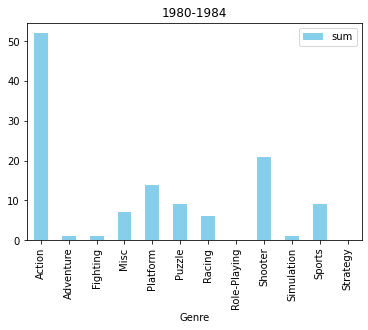

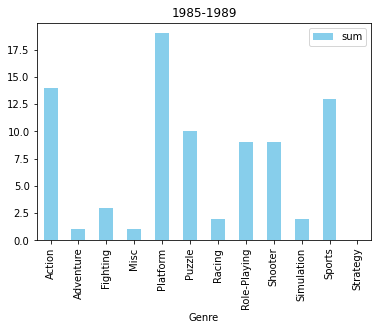

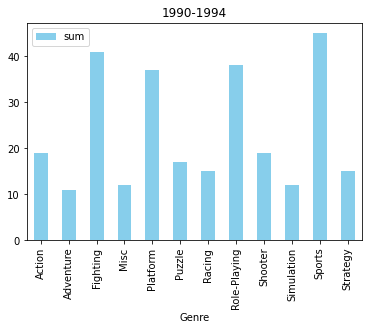

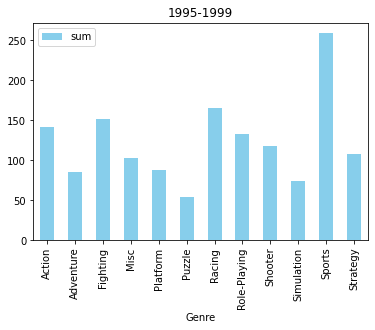

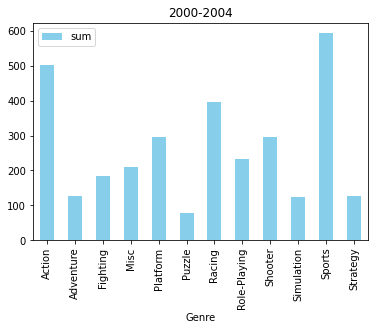

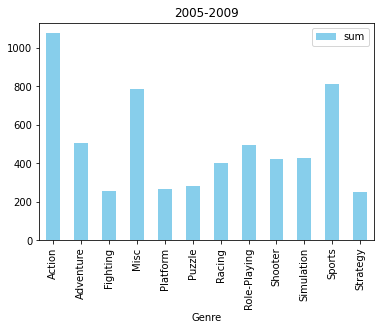

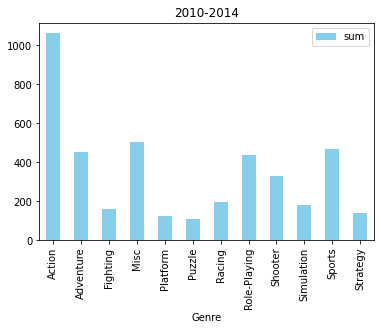

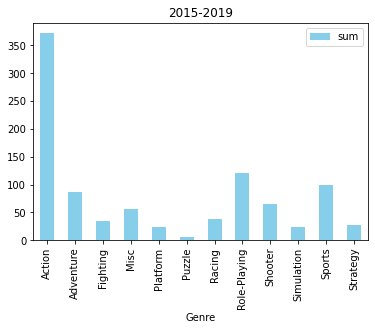

In [374]:
df1980.plot(kind ='bar',color='skyblue')
plt.title('1980-1984')
df1985.plot(kind ='bar',color='skyblue')
plt.title('1985-1989')
df1990.plot(kind ='bar',color='skyblue')
plt.title('1990-1994')
df1995.plot(kind ='bar',color='skyblue')
plt.title('1995-1999')
df2000.plot(kind ='bar',color='skyblue')
plt.title('2000-2004')
df2005.plot(kind ='bar',color='skyblue')
plt.title('2005-2009')
df2010.plot(kind ='bar',color='skyblue')
plt.title('2010-2014')
df2015.plot(kind ='bar',color='skyblue')
plt.title('2015-2019')

#📌매출이 높았던 게임은 어떤 게임일까

#### .

In [375]:
#매출이 높은 게임에 대한 분석 및 시각화
df3 = df[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df3

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,0.04,0.00,0.00,0.00
2,The Munchables,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,0.01,0.00,0.00,0.00
16596,NBA 2K16,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,0.05,0.05,0.25,0.03


####✔️북미 매출 TOP5 게임

In [376]:
df3_1 = df[['Name','Genre','Year','NA_Sales']]
df3_1 =df3_1.sort_values(by='NA_Sales',ascending=False)
df3_1.head(5)

,Name,Genre,Year,NA_Sales
2909,Wii Sports,Sports,2006.0,41.49
4200,Super Mario Bros.,Platform,1985.0,29.08
10489,Duck Hunt,Shooter,1984.0,26.93
1204,Tetris,Puzzle,1989.0,23.20
12580,Mario Kart Wii,Racing,2008.0,15.85


####✔️유럽 매출 TOP5 게임

In [377]:
df3_2 = df[['Name','Genre','Year','EU_Sales']]
df3_2 =df3_2.sort_values(by='EU_Sales',ascending=False)
df3_2.head(5)

,Name,Genre,Year,EU_Sales
2909,Wii Sports,Sports,2006.0,29.02
12580,Mario Kart Wii,Racing,2008.0,12.88
3353,Wii Sports Resort,Sports,2009.0,11.01
11138,Nintendogs,Simulation,2005.0,11.00
3484,Grand Theft Auto V,Action,2013.0,9.27


####✔️일본 매출 TOP5 게임

In [378]:
df3_3 = df[['Name','Genre','Year','JP_Sales']]
df3_3 =df3_3.sort_values(by='JP_Sales',ascending=False)
df3_3.head(5)

,Name,Genre,Year,JP_Sales
7830,Pokemon Red/Pokemon Blue,Role-Playing,1996.0,10.22
9417,Pokemon Gold/Pokemon Silver,Role-Playing,1999.0,7.20
4200,Super Mario Bros.,Platform,1985.0,6.81
6938,New Super Mario Bros.,Platform,2006.0,6.50
10556,Pokemon Diamond/Pokemon Pearl,Role-Playing,2006.0,6.04


####✔️그 외 지역 매출 TOP5 게임

In [379]:
df3_4 = df[['Name','Genre','Year','Other_Sales']]
df3_4 =df3_4.sort_values(by='Other_Sales',ascending=False)
df3_4.head(5)

,Name,Genre,Year,Other_Sales
14670,Grand Theft Auto: San Andreas,Action,2004.0,10.57
2909,Wii Sports,Sports,2006.0,8.46
14666,Gran Turismo 4,Racing,2004.0,7.53
3484,Grand Theft Auto V,Action,2013.0,4.14
12580,Mario Kart Wii,Racing,2008.0,3.31


####.

In [380]:
#매출의 합이 가장 큰 순서대로 정렬
df4 = df[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df4 = df4.set_index('Name')

def fun(col):
    sum=0
    for i in col:
        sum += i
    return sum

df4 = df4.apply(fun,axis =1)
df4=df4.reset_index()
df4.columns=['Name','sum']
df4 = df4.sort_values(by='sum',ascending=False)
df4 = df4.head(10)
df4 = df4.set_index('Name')
df4

,sum
Name,
Wii Sports,82.74
Super Mario Bros.,40.24
Mario Kart Wii,35.83
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.38
Tetris,30.26
New Super Mario Bros.,30.01
Wii Play,29.01
New Super Mario Bros. Wii,28.61


####✔️모든 지역 매출의 총합이 가장 큰 게임은
#🎮Wii Sports🎮

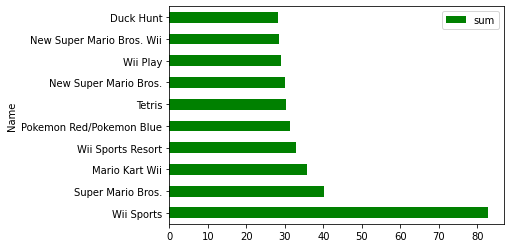

In [381]:
df4.plot(kind ='barh',color='green')

#### .

In [382]:
#Wii Sports 정보찾기
df_wii = df.loc[2909]
dfwii_sales = df_wii[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_wii

Name           Wii Sports
Platform              Wii
Year                 2006
Genre              Sports
Publisher        Nintendo
NA_Sales            41.49
EU_Sales            29.02
JP_Sales             3.77
Other_Sales          8.46
Name: 2909, dtype: object

####✔️Wii Sports는 어느 지역에서 가장 많이 팔렸을까

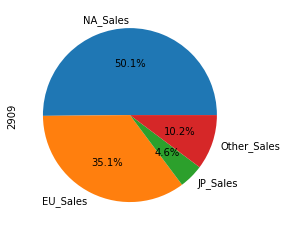

In [383]:
dfwii_sales.plot(kind='pie',autopct='%1.1f%%')